<a href="https://colab.research.google.com/github/GeniusGun/python/blob/master/OpenCV/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

# https://youbidan.tistory.com/19

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import sys
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
image_color = cv2.imread('/content/drive/My Drive/Colab Notebooks/python/OpenCV/data/pub.jpg', cv2.IMREAD_COLOR)
image_gray = cv2.imread('/content/drive/My Drive/Colab Notebooks/python/OpenCV/data/pub.jpg', cv2.IMREAD_GRAYSCALE)
image_origin = cv2.imread('/content/drive/My Drive/Colab Notebooks/python/OpenCV/data/pub.jpg', cv2.IMREAD_COLOR)

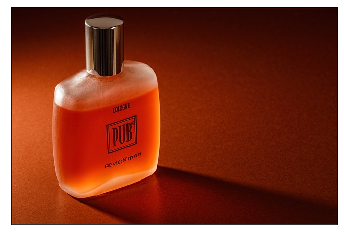

In [32]:
b, g, r = cv2.split(image_color)
img = cv2.merge([r, g, b])

plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.show()

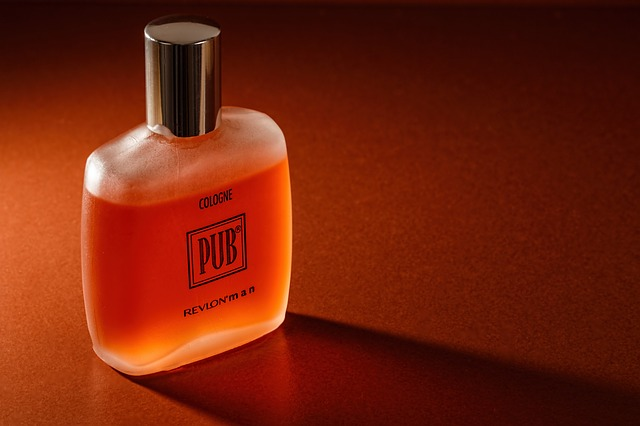

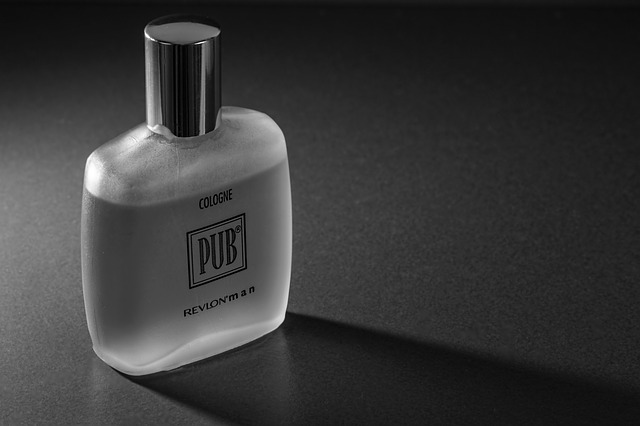

In [33]:
cv2_imshow(image_color)
cv2_imshow(image_gray)

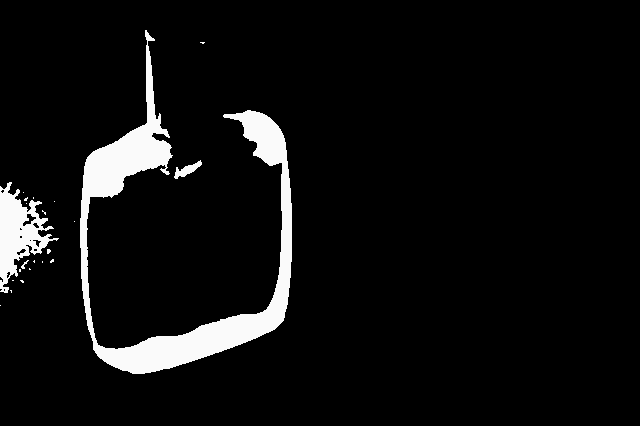

In [34]:
blur = cv2.GaussianBlur(image_gray, ksize=(5,5), sigmaX=0)
ret, thresh1 = cv2.threshold(blur,125,250,cv2.THRESH_BINARY)

# cv2_imshow(blur)
cv2_imshow(thresh1)

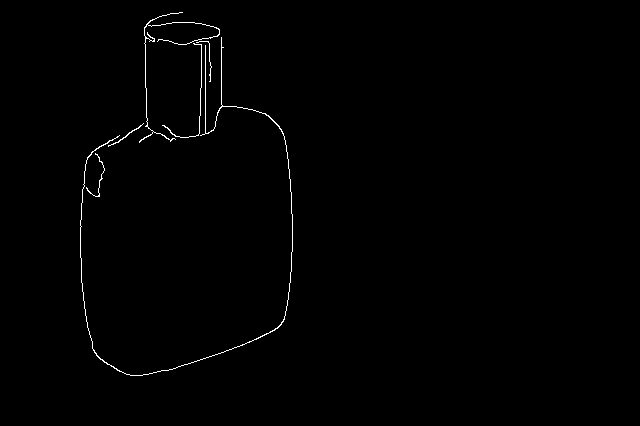

In [35]:
edged = cv2.Canny(blur, 10, 280)
cv2_imshow(edged)
# cv2.waitKey(0)

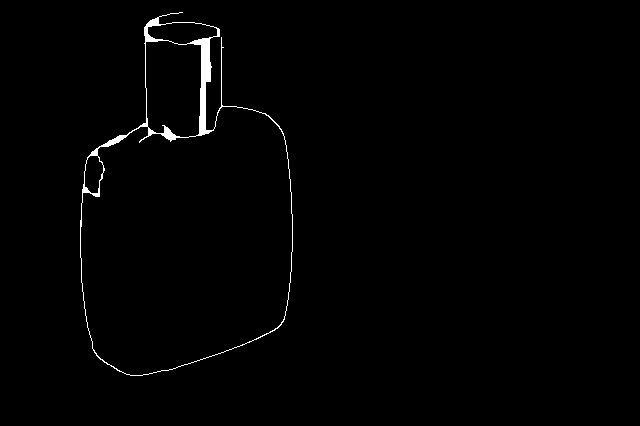

-1

In [36]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)
cv2.waitKey(0)

In [0]:
contours,_ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

다음의 코드는 이미지 외곽에 초록색 경계선을 만드는것으로 원본을 변경 시킨다

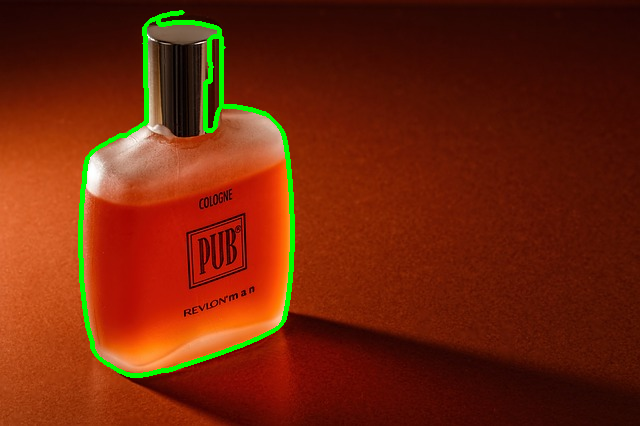

In [38]:
contours_image = cv2.drawContours(image_color, contours, -1, (0,255,0),3)
cv2_imshow(contours_image)

In [39]:
contours_xy = np.array(contours)
contours_xy.shape

(1, 356, 1, 2)

x, y의 좌표 찾기

In [40]:
x_min, x_max = 0, 0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0])       # 4번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min, x_max)

y_min, y_max = 0, 0
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1])
        y_min = min(value)
        y_max = max(value)
print(y_min, y_max)

80 292
12 375


원하는 이미지만 남기고 잘라내기

In [0]:
x = x_min
y = y_min
w = x_max - x_min
h = y_max - y_min

img_trim = image_origin[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg',img_trim)
org_image = cv2.imread('org_trim.jpg')

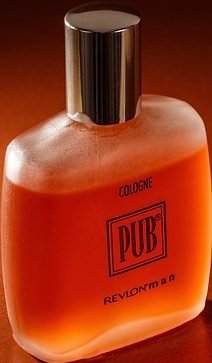

In [42]:
cv2_imshow(org_image)